In [23]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression



In [24]:
df=pd.read_csv('50_Startups.csv')

In [25]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

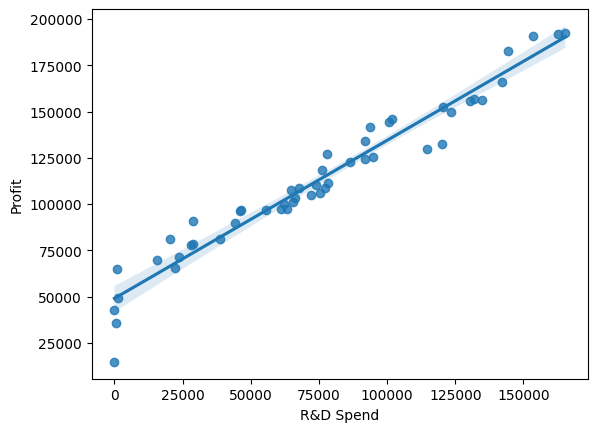

In [26]:
sb.regplot(x='R&D Spend', y='Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

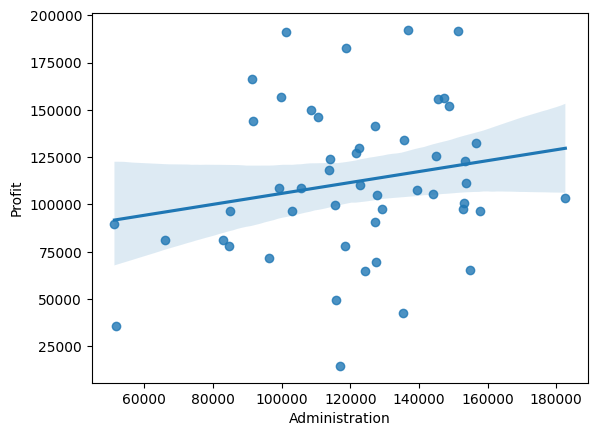

In [27]:
sb.regplot(x='Administration', y='Profit',data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

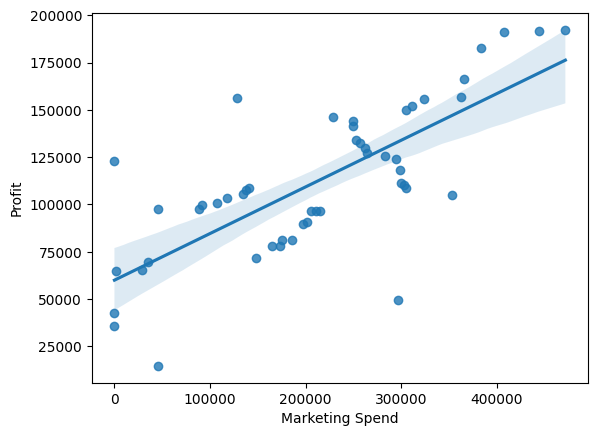

In [28]:
sb.regplot(x='Marketing Spend', y='Profit',data=df)

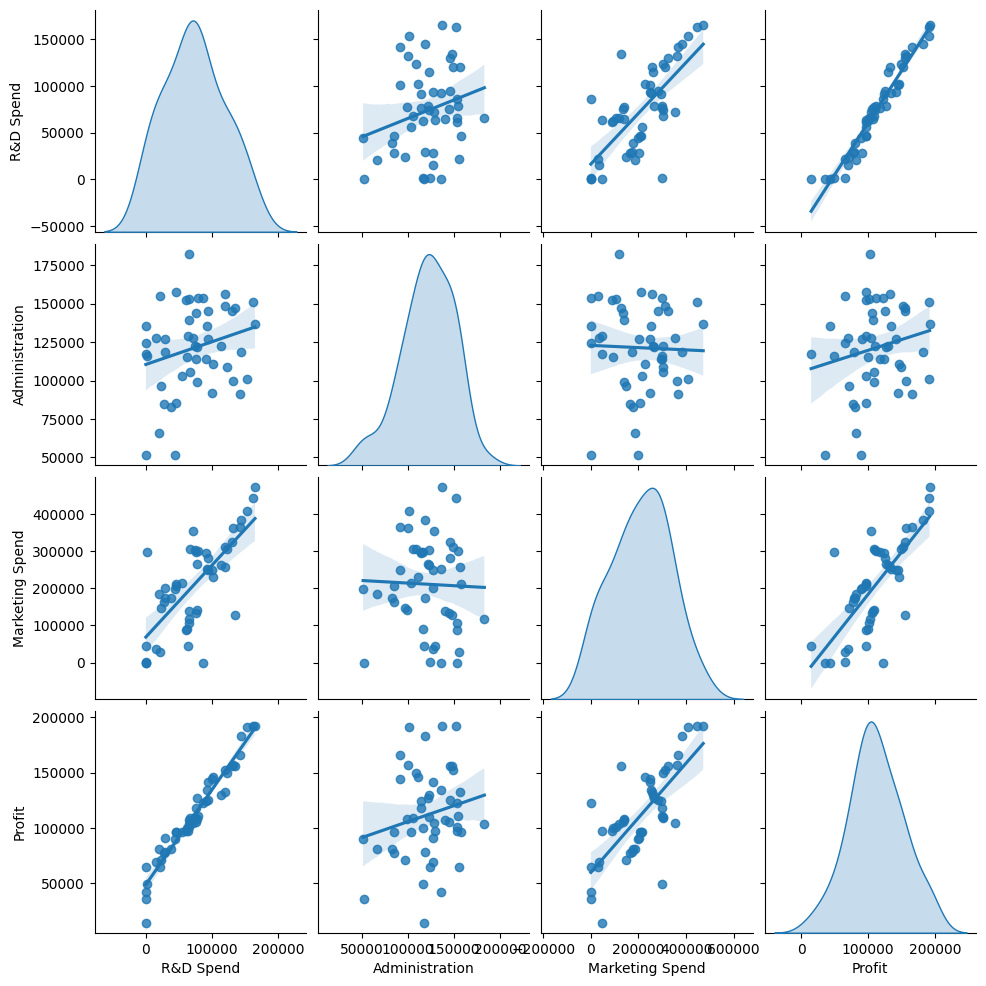

In [29]:
sb.pairplot (df, kind='reg', diag_kind='kde')

<Axes: xlabel='State', ylabel='Profit'>

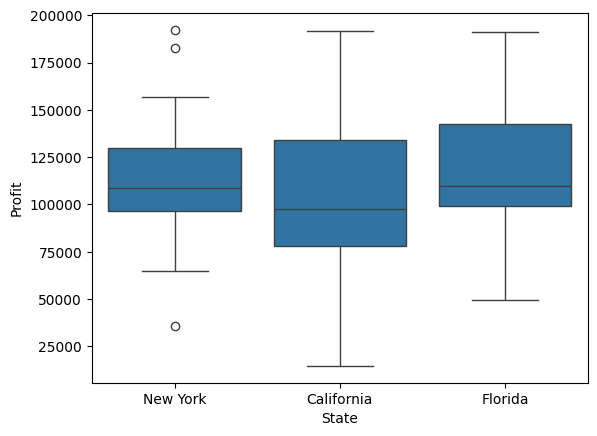

In [30]:
sb.boxplot(x='State', y='Profit',data=df)

In [31]:
#feature selection
X=df.drop(columns=['Profit'])
y=df['Profit']

In [32]:
# train and test split
Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.2, random_state=42)

In [33]:
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(include='number').columns

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# column transformer is used to apply different transformations to different columns of the dataframe 
# FIT_TRANSFORMATION is used to fit and tranform the data in one step 

# making Pipeline

In [35]:
cat_pipe=Pipeline(
    steps=[
        ('onehot',OneHotEncoder(drop='first'))
    ]
)

In [36]:
num_pipe=Pipeline(
    steps=[
        ('scalar',StandardScaler())
    ]
)

In [37]:
preprocessor=ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,num_cols)
])

In [38]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression)
])

In [39]:
# to save the modal into note
from joblib import dump, load
with open('modals/multiple_linear_regression_model.pkl','wb') as f:
    dump(model, f)
    print('model dumped!')

model dumped!


In [40]:
import gradio as gr
import pandas as pd
def prediction(rnd, admin, marketing, state):
    #make a single record dataframe 
    df=pd.DataFrame({'R&D Spend':[rnd],
                     'Administration':[admin],
                     'Marketing Spend':[marketing],
                     'State':[state]})
    # load joblib model
    with open ('models\multiple_linear_regression_model.pkl','rb') as f: # use 'rb' for reading binary file
        model=load(f)
    #predict the profit
    profit = model.predict(df) # return numpy array
    return profit[0] # return the first element of the array
ui=gr.Interface(
    fn=prediction,
    inputs=['number','number','number','text'],
    outputs=gr.Text(),
    title='Multiple Linear Regression Model',
    examples=[[165349.55,123549,8879458,'New York'],
              [589996.56,668943.55,668787.5,'Carlifonia']]
)
ui.launch()


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/var/folders/hk/7dczckm90x57dp42fc4bwqg40000gn/T/ipykernel_6491/2150219007.py:10: SyntaxWarning: invalid escape sequence '\m'
  with open ('models\multiple_linear_regression_model.pkl','rb') as f: # use 'rb' for reading binary file


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
<unknown>:2: SyntaxWarning: invalid escape sequence '\m'
<unknown>:1: SyntaxWarning: invalid escape sequence '\m'
  File "/Users/zaydie/Desktop/github/.venv/lib/python3.13/site-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "/Users/zaydie/Desktop/github/.venv/lib/python3.13/site-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "/Users/zaydie/Desktop/github/.venv/lib/python3.13/site-packages/gradio/blocks.py", line 2116, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "/Users/zaydie/Desktop/github/.venv/lib/python3.13/site-packages/gradio/blocks.py", line 1623, in call_fu